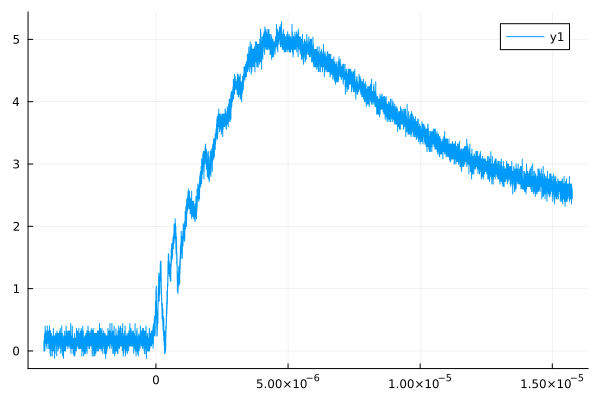

In [114]:
using Plots
using DataFrames
using CSV
using LsqFit

dt = CSV.read("data/D05AB_SC90.CSV", DataFrame)
plot(dt.Time, dt.Volt)

In [ ]:
# 真のパラメータ
true_params = [2.0, 0.5, 1.0]

# モデルの定義（指数関数の例）
model(x, p) = p[1] * exp.(-p[2] * x) .+ p[3]

# xデータとノイズを加えたyデータを生成
xdata = range(0, stop=10, length=100)
ydata = model(xdata, true_params) .+ 0.1 * randn(length(xdata))

# 初期パラメータの推測
initial_params = [1.0, 1.0, 1.0]

# フィッティングの実行
fit_result = curve_fit(model, xdata, ydata, initial_params)

# フィッティングされたパラメータ
fitted_params = fit_result.param
println("Fitted Parameters: ", fitted_params)

# フィッティング結果を使用してy値を計算
yfit = model(xdata, fitted_params)

# データとフィッティング結果をプロット
plot(xdata, ydata, label="Data", lw=2, linestyle=:dash)
plot!(xdata, yfit, label="Fit", lw=2)

In [ ]:
dt1 = dt[dt.Time.>0,:]
plot(dt1.Time, dt1.Volt)

In [ ]:
dt2 = dt1[dt1.Time.< 4.2e-6, :]
plot(dt2.Time, dt2.Volt*800)

In [ ]:
model(x, p) = @. p[1] * (1 - exp(-(x /p[2])))
# 初期パラメータの推測
initial_params = [5300,4e-6]

# フィッティングの実行
fit_result = curve_fit(model, dt2.Time, dt2.Volt*800, initial_params)

# フィッティングされたパラメータ
fitted_params = fit_result.param
println("Fitted Parameters: ", fitted_params)

# フィッティング結果を使用してy値を計算
yfit = model(dt2.Time, fitted_params)

plot(dt2.Time, dt2.Volt*800)
plot!(dt2.Time ,yfit)



In [ ]:
df = DataFrame(;
    Temp=[20, 100, 200, 300, 500],
    SHC=[385, 392, 402, 412, 429],
    )

plot(df.Temp, df.SHC,seriestype=:scatter, label="specific heat capacity")

model(x, p) = p[1] * x.+ p[2]

initial_params = [0.1, 350]

# フィッティングの実行
fit_result = curve_fit(model, df.Temp, df.SHC, initial_params)

# フィッティングされたパラメータ
fitted_params = fit_result.param
println("Fitted Parameters: ", fitted_params)

# フィッティング結果を使用してy値を計算
yfit = model(df.Temp, fitted_params)

plot!(df.Temp, yfit, label="fit")
